## Example 3 (Direct and Indirect Pathways): 

Here we investigate the effect of ENSO on the Southern Hemisphere mid-latitude jet (Jet) in the early summer months (OND). In early summer the Jet position is known to be influenced by the timing of the breakdown of the Southern Hemispheric polar vortex (Vortex), via the stratosphere-troposphere coupling. Furthermore, there is evidence that ENSO affects the Vortex too. In summary, ENSO affects the Jet directly, via a tropospheric pathway, and indirectly via the Vortex, also called the stratospheric pathway. We quantify both pathways and to compare their relative importance.


<img src="../images/ex3.png" width="500" height="600">

## Imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import iris
import iris.quickplot as qplt

import statsmodels.api as sm
from scipy import signal

### Step 1) Load the data

In [3]:
# data from 1950 to 2019, year 2002 was removed because it is the only SH Sudden Stratospheric Warming on record.

enso   = iris.load_cube('../sample_data/enso_full_ond_no2002.nc')
jet    = iris.load_cube('../sample_data/sh_jet_ond_no2002.nc')  
vortex = iris.load_cube('../sample_data/vortex_breakdown_no2002.nc') #'breakdown date in days after 1st Oct' )

#### Plot the data

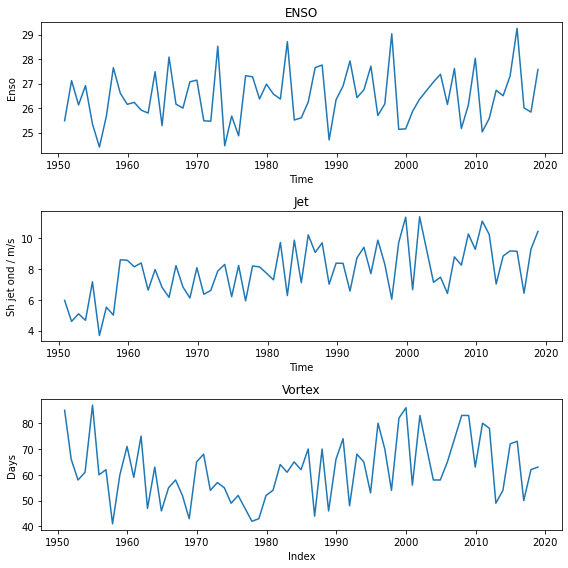

In [4]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(311)
qplt.plot(enso)
plt.title('ENSO')

plt.subplot(312)
qplt.plot(jet)
plt.title('Jet')

plt.subplot(313)
qplt.plot(vortex)
plt.title('Vortex')
plt.tight_layout()


### Step 2) Data analysis using regression

#### Standardize the data (zero mean, unit variance)

In [5]:
ENSO = (enso - np.mean(enso.data))/np.std(enso.data)
JET = (jet - np.mean(jet.data))/np.std(jet.data)
VORTEX = (vortex - np.mean(vortex.data))/np.std(vortex.data)

#### Detrend

In [6]:
ENSO   = signal.detrend(ENSO.data)
JET    = signal.detrend(JET.data)
VORTEX = signal.detrend(VORTEX.data)

#### Regression analysis

In [7]:
# Determine the total effect from -ENSO --> JET
Y = JET
X =  ENSO

model = sm.OLS(Y,X)
results = model.fit()

ENSOtoJET_tot = round(results.params[0],2)

print("total effect of ENSO on JET  =",ENSOtoJET_tot)

total effect of ENSO on JET  = -0.14


In [8]:
# Determine the tropospheric-only effect from ENSO --> JET via conditioning on VORTEX 
Y = JET
X = np.stack([ENSO, VORTEX]).T

model = sm.OLS(Y,X)
results = model.fit()

ENSOtoJET_tropo = round(results.params[0],2)
VORTEXtoJET     = round(results.params[1],2)

print("Jet = %.2f ENSO + %.2f VORTEX \n"%(ENSOtoJET_tropo,VORTEXtoJET))

print("direct (tropospheric) pathway from ENSO to JET  =", ENSOtoJET_tropo)

Jet = -0.04 ENSO + 0.39 VORTEX 

direct (tropospheric) pathway from ENSO to JET  = -0.04


In [9]:
# Determine the stratoshperic pathway from ENSO --> JET
Y = VORTEX
X = ENSO

model = sm.OLS(Y,X)
results = model.fit()

ENSOtoVORTEX = round(results.params[0],2)
ENSOtoJET_strato = round(ENSOtoVORTEX*VORTEXtoJET,2)

print("Vortex = %.2f ENSO \n"%(ENSOtoVORTEX))

print("indirect (stratospheric) patwhay from ENSO to JET via VORTEX = %.2f * %.2f = %.2f "% (ENSOtoVORTEX,VORTEXtoJET, ENSOtoJET_strato ))

Vortex = -0.26 ENSO 

indirect (stratospheric) patwhay from ENSO to JET via VORTEX = -0.26 * 0.39 = -0.10 


In [10]:
# Compare the total effect with the sum of the stratospheric and tropospheric patways

print("total effect of ENSO on JET  =",ENSOtoJET_tot)

print("tropospheric + stratospheric pathways = %g + %g = %g"\
      %(ENSOtoJET_tropo, ENSOtoJET_strato, ENSOtoJET_tropo+ENSOtoJET_strato))

total effect of ENSO on JET  = -0.14
tropospheric + stratospheric pathways = -0.04 + -0.1 = -0.14


#### Conclusions

Using a simple regression of JET on ENSO, a relatively large negative effect is found (-0.14).
Separating the indirect stratospheric pathway (ENSO $\to$ VORTEX $\to$ JET) from the direct tropospheric pathway (ENSO$\to$JET) the direct effect of ENSO on JET is weakened (-0.04) and the indirect effect dominates (-0.10).
